### Feature Selection

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Define the directory where models will be saved
models_dir = r"C:\Users\menah\Downloads\Heart_Disease_Project\data"

model_path = os.path.join(models_dir, 'X_train_pca.csv')
X_train_pca_df= pd.read_csv(model_path)

model_path = os.path.join(models_dir, 'X_test_pca.csv')
X_test_pca_df=pd.read_csv(model_path) 

model_path = os.path.join(models_dir, 'heart_disease_target_test.csv')
y_test=pd.read_csv(model_path) 

model_path = os.path.join(models_dir, 'heart_disease_target_train.csv')
y_train=pd.read_csv(model_path)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier
from sklearn.feature_selection import RFE ,SelectKBest ,chi2
from sklearn.preprocessing import MinMaxScaler

In [10]:
def plot_feature_importance(model, X, y, title):
    model.fit(X, y)
    importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importances['Feature'], importances['Importance'])
    plt.gca().invert_yaxis()
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.title(title)
    plt.show()
    return importances

### Recursive Feature Elimination (RFE)

c:\Users\menah\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


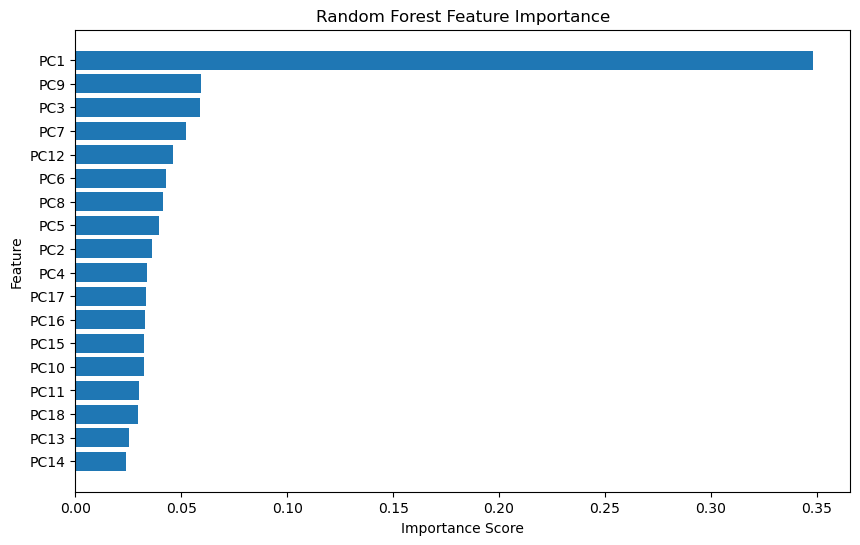

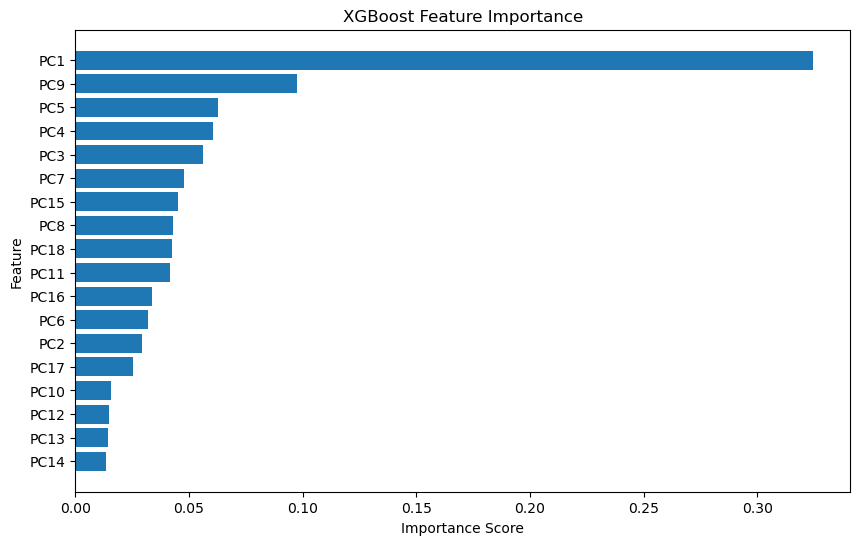

In [11]:
rf_importances = plot_feature_importance(RandomForestClassifier(random_state=42), X_train_pca_df, y_train, "Random Forest Feature Importance")
xg_importances = plot_feature_importance(XGBClassifier(random_state=42, eval_metric='logloss'), X_train_pca_df, y_train, "XGBoost Feature Importance")

In [12]:
rfe_rf = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe_rf.fit(X_train_pca_df, y_train)
rfe_features_rf = X_train_pca_df.columns[rfe_rf.support_]

print("\nRFE (RF):", list(rfe_features_rf))

c:\Users\menah\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\menah\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\menah\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\menah\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for


RFE (RF): ['PC1', 'PC2', 'PC3', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC12', 'PC17']


c:\Users\menah\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [13]:
rfe_xgb = RFE(estimator=XGBClassifier(random_state=42, eval_metric='logloss'), n_features_to_select=10)
rfe_xgb.fit(X_train_pca_df, y_train)
rfe_features_xgb = X_train_pca_df.columns[rfe_xgb.support_]

print("\nRFE (XGB):", list(rfe_features_xgb))


RFE (XGB): ['PC1', 'PC3', 'PC4', 'PC5', 'PC7', 'PC8', 'PC9', 'PC11', 'PC15', 'PC18']


In [14]:
scaler = MinMaxScaler()
X_train_nonneg = scaler.fit_transform(X_train_pca_df)  # ensure non-negative

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_train_nonneg, y_train)
chi2_features = X_train_pca_df.columns[chi2_selector.get_support()]

print("\nChi-Square Top Features:", list(chi2_features))

# ===== 4. FINAL FEATURE SETS =====
final_features_union = list(set(rfe_features_rf) | set(chi2_features) | set(rfe_features_xgb))
final_features_intersection = list(set(rfe_features_rf) & set(chi2_features) & set(rfe_features_xgb))

print("\nFinal Features (Union):", final_features_union)
print("\nFinal Features (Intersection):", final_features_intersection)


Chi-Square Top Features: ['PC1', 'PC2', 'PC3', 'PC5', 'PC6', 'PC9', 'PC15', 'PC16', 'PC17', 'PC18']

Final Features (Union): ['PC17', 'PC8', 'PC16', 'PC3', 'PC5', 'PC7', 'PC15', 'PC9', 'PC2', 'PC11', 'PC18', 'PC12', 'PC6', 'PC1', 'PC4']

Final Features (Intersection): ['PC9', 'PC5', 'PC3', 'PC1']
